# Analysis of US Senator Voting Clusters

## Import Packages

In [1]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import numpy as np

As part of another projects, I scraped all Senate roll call votes. I use that data here.

In [2]:
data_path = "/Users/nj995/dropbox/data/senate_votes/"

## Parameters

In [3]:
# How often does a Senator have to vote to be considered? 80% of the time.
freq_cutoff = 0.8

## Define Functions

In [6]:
def data_processing(year, freq_cutoff):
    
    congress_num = math.floor((year-1787)/2)
    session = (year+1)%2 +1
    
    senate_votes = pd.read_csv(data_path+'senate_votes_{}_{}.csv'.format(congress_num, session))
    
    # Replace Yea = 1 and Nay = -1 (other = 0)
    vote_cols = [col for col in list(senate_votes) if col[:5]=='vote_']
    nb_votes = len(vote_cols)
    for i in range(nb_votes):
        vote_num = str(i+1).zfill(5)
        senate_votes['temp_'+vote_num]=0.
        senate_votes.loc[senate_votes['vote_'+vote_num]=='Yea', 'temp_'+vote_num]=1.
        senate_votes.loc[senate_votes['vote_'+vote_num]=='Nay', 'temp_'+vote_num]=-1.
        del senate_votes['vote_'+vote_num]
        senate_votes.rename(columns={'temp_'+vote_num:'vote_'+vote_num}, inplace=True)
        
    #Exclude short term senators 
    senate_votes = senate_votes[abs(senate_votes[vote_cols]).sum(axis=1)>(freq_cutoff*nb_votes)]
    senate_votes = senate_votes.reset_index(drop = True)

    votes = senate_votes[vote_cols]
    sen_info = senate_votes.copy()
    for col in vote_cols:
        del sen_info[col]
    
    return votes, sen_info

In [7]:
def pca_analysis(X, components = 2):
    
    X_std = StandardScaler().fit_transform(X)
    sklearn_pca = sklearnPCA(n_components = components)
    c_alpha = sklearn_pca.fit_transform(X_std)
    
    return c_alpha

In [8]:
def pca_plot(c_alpha, sen_info, year):
    pca_1 = c_alpha[:,0]
    pca_2 = c_alpha[:,1]
    
    name = sen_info['senator_name']
    color = sen_info['senator_party'].apply(
        lambda x: np.where(x=="R", "red", np.where(x=="D", "blue", "green"))
    )

    fig, ax = plt.subplots(1, 1, figsize = (13,13))
    ax.scatter(pca_1, pca_2, c = color)

    for i, txt in enumerate(name):
        ax.annotate(txt, (pca_1[i], pca_2[i]), fontsize = 13, color = 'black');
        
    ax.set_title('Distribution of US Senators according to Senate Votes ({})'.format(year), size = 'xx-large')
    plt.xlabel('PCA Axis 1', size = 'x-large')
    plt.ylabel('PCA Axis 2', size = 'x-large')
    
    # Export Table for Tableau Plotting:
    congress_num = math.floor((year-1787)/2)
    session = (year+1)%2 +1
    df = pd.DataFrame(c_alpha).rename(columns={0:'pca_1', 1:'pca_2'})
    df = pd.concat([sen_info, df], axis=1)
    df.to_csv('../output/intermediate/senator_votes_pca_{}_{}.csv'.format(congress_num, session), index=False)

## 1993 Analysis (President Clinton's First Year) 

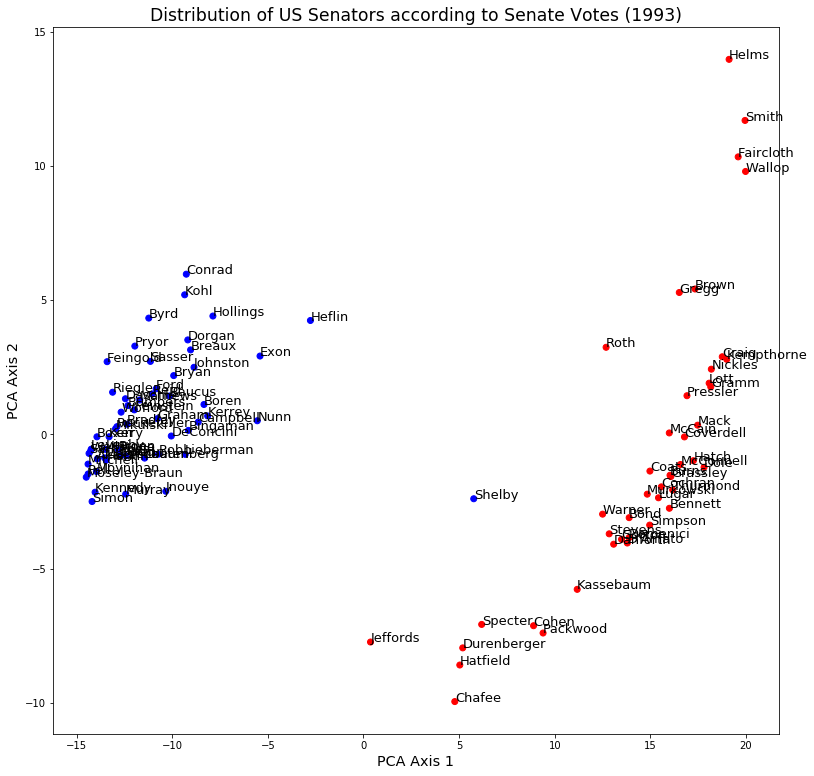

In [9]:
year = 1993
votes, sen_info = data_processing(year, freq_cutoff)
c_alpha= pca_analysis(votes)
pca_plot(c_alpha, sen_info, year)

## 2001 Analysis (President Bush's First Year)

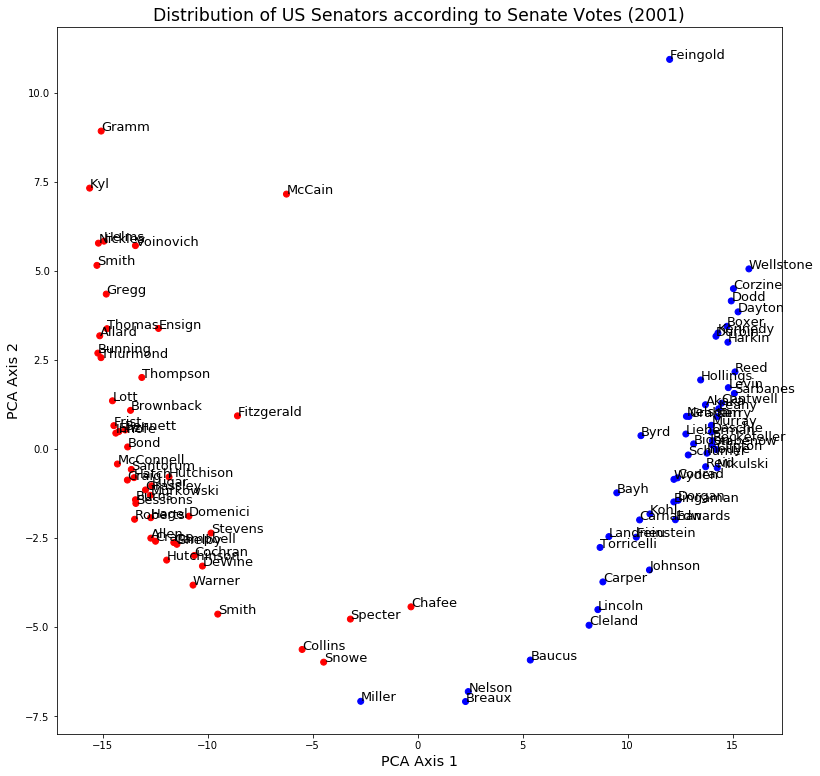

In [10]:
year = 2001
votes, sen_info = data_processing(year, freq_cutoff)
c_alpha = pca_analysis(votes)
pca_plot(c_alpha, sen_info, year)

## 2009 Analysis (President Obama's First Year)

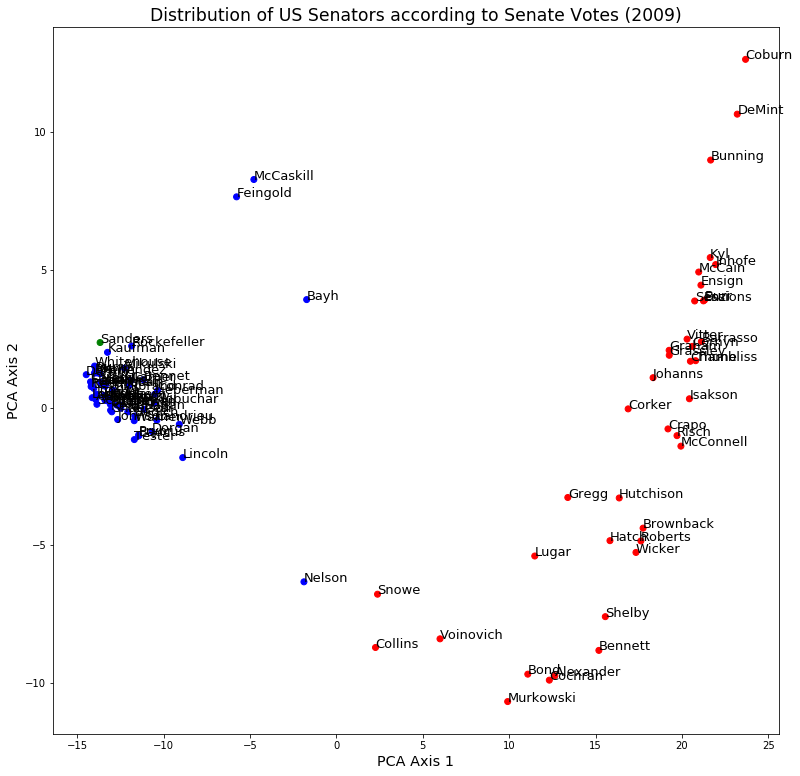

In [11]:
year = 2009
votes, sen_info = data_processing(year, freq_cutoff)
c_alpha = pca_analysis(votes)
pca_plot(c_alpha, sen_info, year)

## 2017 Analysis (President Trump's First Year)

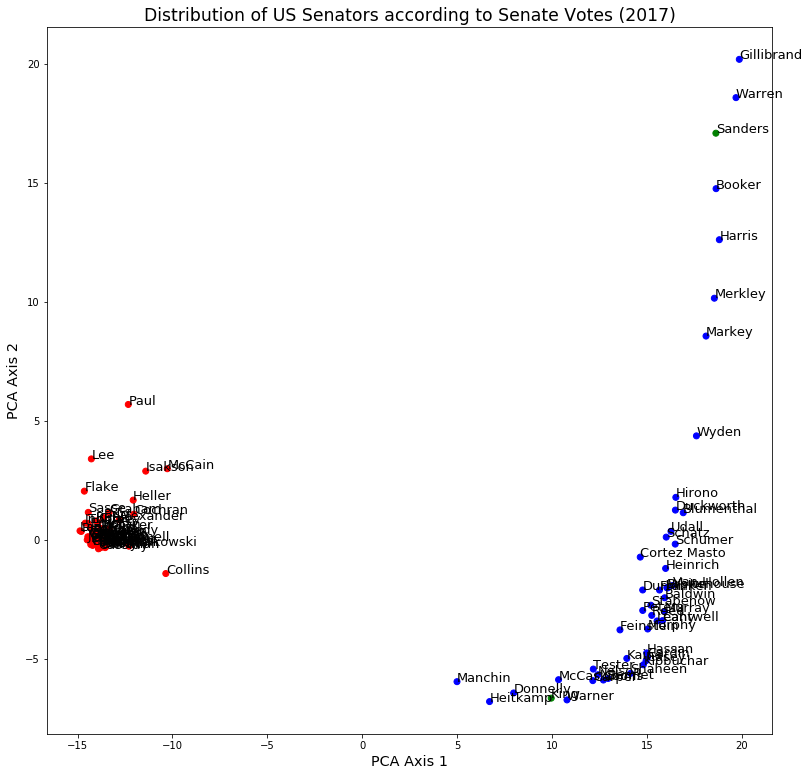

In [12]:
year = 2017
votes, sen_info = data_processing(year, freq_cutoff)
c_alpha = pca_analysis(votes)
pca_plot(c_alpha, sen_info, year)

## Sandbox